# **LEAD SCORING ASSIGNMENT**


---

**PROBLEM STATEMENT:**

  - ***`An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and earch engines like Google. When people fill up a form providing their email address or phone number, they are classified to be a ead. Once these leads are acquired, employees from the sales team tart making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The company requires a model wherein you need to assign a lead score to each of the leads uch that the customers with a higher lead score have a higher onversion chance and the customers with a lower lead score have a ower conversion chance. The CEO has given a ballpark of the target aad conversion rate to be around 80%.`***

# **1. Reading and Understanding the data**

In [2593]:
## Importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2594]:
## Importing and reading the dataset into dataframe


path = "F:\Git_profile\Logistic Regression\Lead Scoring Assignment/Leads.csv"
lead_dt = pd.read_csv(path)

In [2595]:
## Settings to display output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2596]:
lead_dt.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [2597]:
## Number of Rows and Columns of the dataframe
lead_dt.shape

(9240, 37)

In [2598]:
## Checking all the columns

lead_dt.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [2599]:
## Checking numerical columns statistics
lead_dt.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2600]:
## Lead information
lead_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# **2. Data Cleaning and Preparation**

***`Relabeling columns and values for better understanding`***

In [2601]:
## Relabeling columns for improved clarity
lead_dt.rename(columns={'What matters most to you in choosing a course':'Course Selection Criteria',
                        'How did you hear about X Education':'Referral Source',
                        'What is your current occupation':'Current Occupation',
                        'Receive More Updates About Our Courses':'Get Course Updates',
                        'Last Notable Activity':'Recent Activity'},inplace=True)

In [2602]:
## Converting 'Select' values to None.
lead_dt = lead_dt.replace('Select', 'None')

In [2603]:
## Relabeling values in "Lead Source" column for improved clarity
lead_dt["Lead Source"].replace({"google": 'Google', "bing": 'Bing',
                                "youtubechannel": 'Youtube', "testone": 'Testone',
                                "blog":"Blog", "welearnblog_Home":"Welearn blog Home"}, inplace=True)
lead_dt["Lead Source"].value_counts()

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
Bing,6


In [2604]:
## Checking assigned names and values
lead_dt.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Referral Source,Current Occupation,Course Selection Criteria,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get Course Updates,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Recent Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,None,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,None,None,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,None,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,None,None,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,None,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,None,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,None,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,None,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


***`Dropping Irrelavant columns and columns with more null values`***

In [2605]:
## Columns - ['I agree to pay the amount through cheque', 'Get Course Updates', 'A free copy of Mastering The Interview', 'Country',
## 'Magazine', 'Update me on Supply Chain Content', and 'Get updates on DM Content', 'Lead Number'].
## The above columns are irrelevant & doesn't bring any new information & doesn't provide any useful insights in model building.

## Hence dropping these columns
lead_dt.drop(['Lead Number', 'I agree to pay the amount through cheque', 'Get Course Updates', 'A free copy of Mastering The Interview',
              'Country', 'Magazine', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City'],
              axis=1, inplace=True)

In [2606]:
## Checking Null values of each column
lead_dt_null_cols = round(100*(lead_dt.isnull().sum()/len(lead_dt.index)), 2).sort_values(ascending = False)
lead_dt_null_cols

,0
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Profile Index,45.65
Asymmetrique Activity Index,45.65
Tags,36.29
Course Selection Criteria,29.32
Lead Profile,29.32
Current Occupation,29.11
Referral Source,23.89


In [2607]:
## Columns with null values more than 40%
lead_dt_null_40 = lead_dt_null_cols[lead_dt_null_cols > 40].index
lead_dt_null_40

Index(['Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'], dtype='object')

In [2608]:
## Dropping columns with null values more than 40%
lead_dt.drop(lead_dt_null_40, axis=1, inplace=True)

***`Imputing null values in columns with appropriate values`***

In [2609]:
## Replace infinite values with NaN
lead_dt.replace([np.inf, -np.inf], np.nan, inplace=True)

## Fill NaN values with 0 and convert float into integer type
lead_dt['TotalVisits'] = lead_dt['TotalVisits'].fillna(0).astype('int64')
lead_dt['TotalVisits']

,TotalVisits
0,0
1,5
2,2
3,1
4,2
...,...
9235,8
9236,2
9237,2
9238,3


In [2610]:
lead_dt['Page Views Per Visit'] = lead_dt['Page Views Per Visit'].fillna(0)

## Checking if 'null values' are replaced with 0
lead_dt['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,  6.5 ,
        4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,  2.25,
        3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,  2.57,
        2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,  3.2 ,
        1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,  1.83,
        3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,  2.9 ,
        1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,  1.86,
        2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,  4.4 ,
        3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,  2.13,
        2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,  3.8 ,
        1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [2611]:
lead_dt['Current Occupation'] = lead_dt['Current Occupation'].fillna('Unemployed')

## Checking if 'null values' are replaced with 'Unemployed'
lead_dt['Current Occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

In [2612]:
lead_dt['Course Selection Criteria'] = lead_dt['Course Selection Criteria'].fillna('Other')

## Checking if 'null values' are replaced with 'Other'
lead_dt['Course Selection Criteria'].unique()

array(['Better Career Prospects', 'Other', 'Flexibility & Convenience'],
      dtype=object)

In [2613]:
lead_dt['Tags'] = lead_dt['Tags'].fillna('Not Interested')

## Checking if 'null values' are replaced with 'Not Interested'
lead_dt['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Not Interested',
       'Lost to EINS', 'In confusion whether part time or DLP', 'Busy',
       'switched off', 'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [2614]:
## Rechecking the null value % in each columns
round(100*(lead_dt.isnull().sum()/len(lead_dt.index)), 2).sort_values(ascending = False)

,0
Lead Profile,29.32
Referral Source,23.89
Specialization,15.56
Last Activity,1.11
Lead Source,0.39
Course Selection Criteria,0.00
Tags,0.00
Through Recommendations,0.00
Digital Advertisement,0.00
Newspaper,0.00


In [2615]:
lead_dt.head(10)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Referral Source,Current Occupation,Course Selection Criteria,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,Recent Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,None,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,None,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5,674,2.5,Email Opened,None,None,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,None,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,Business Administration,None,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,None,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,None,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,None,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,No,No,0,0,0,0.0,Olark Chat Conversation,NaN,NaN,Unemployed,Other,No,No,No,No,No,No,Not Interested,NaN,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2,1640,2.0,Email Opened,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,No,No,0,0,0,0.0,Olark Chat Conversation,NaN,NaN,Unemployed,Other,No,No,No,No,No,No,Not Interested,NaN,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,No,0,2,71,2.0,Email Opened,IT Projects Management,NaN,Unemployed,Other,No,No,No,No,No,No,Not Interested,NaN,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,No,0,4,58,4.0,Email Opened,Finance Management,Word Of Mouth,Unemployed,Other,No,No,No,No,No,No,Not Interested,NaN,Email Opened


In [2616]:
lead_dt.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'Referral Source', 'Current Occupation', 'Course Selection Criteria', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'Recent Activity'], dtype='object')

In [2617]:
lead_dt.shape

(9240, 23)

***INSIGHTS:***
- ***`9240 rows and 24 columns.`***
- ***`From data, we understood that:`***
    - *`Columns - ['I agree to pay the amount through cheque', 'Get Course Updates', 'A free copy of Mastering The Interview', 'Country', 'Magazine', 'Update me on Supply Chain Content', and 'Get updates on DM Content']. These columns are irrelevant & doesn't bring any new information & doesn't provide any useful insights in model building. Hence dropping these columns.`*
    - *`Columns - ['Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'] are dropped beacsuse of having null percentage more then 40.`*
- ***`TARGET variable/column is 'Converted'`***

# **3. Exploratory Data Analysis**

**3.1 DATA VISUALIZATION**

In [2618]:
## Checking the Converted Rate
Converted = (sum(lead_dt['Converted'])/len(lead_dt['Converted'].index))*100
Converted

38.53896103896104

***3.1.1 Numerical Columns***

***`Boxplot for numerical varaiables`***

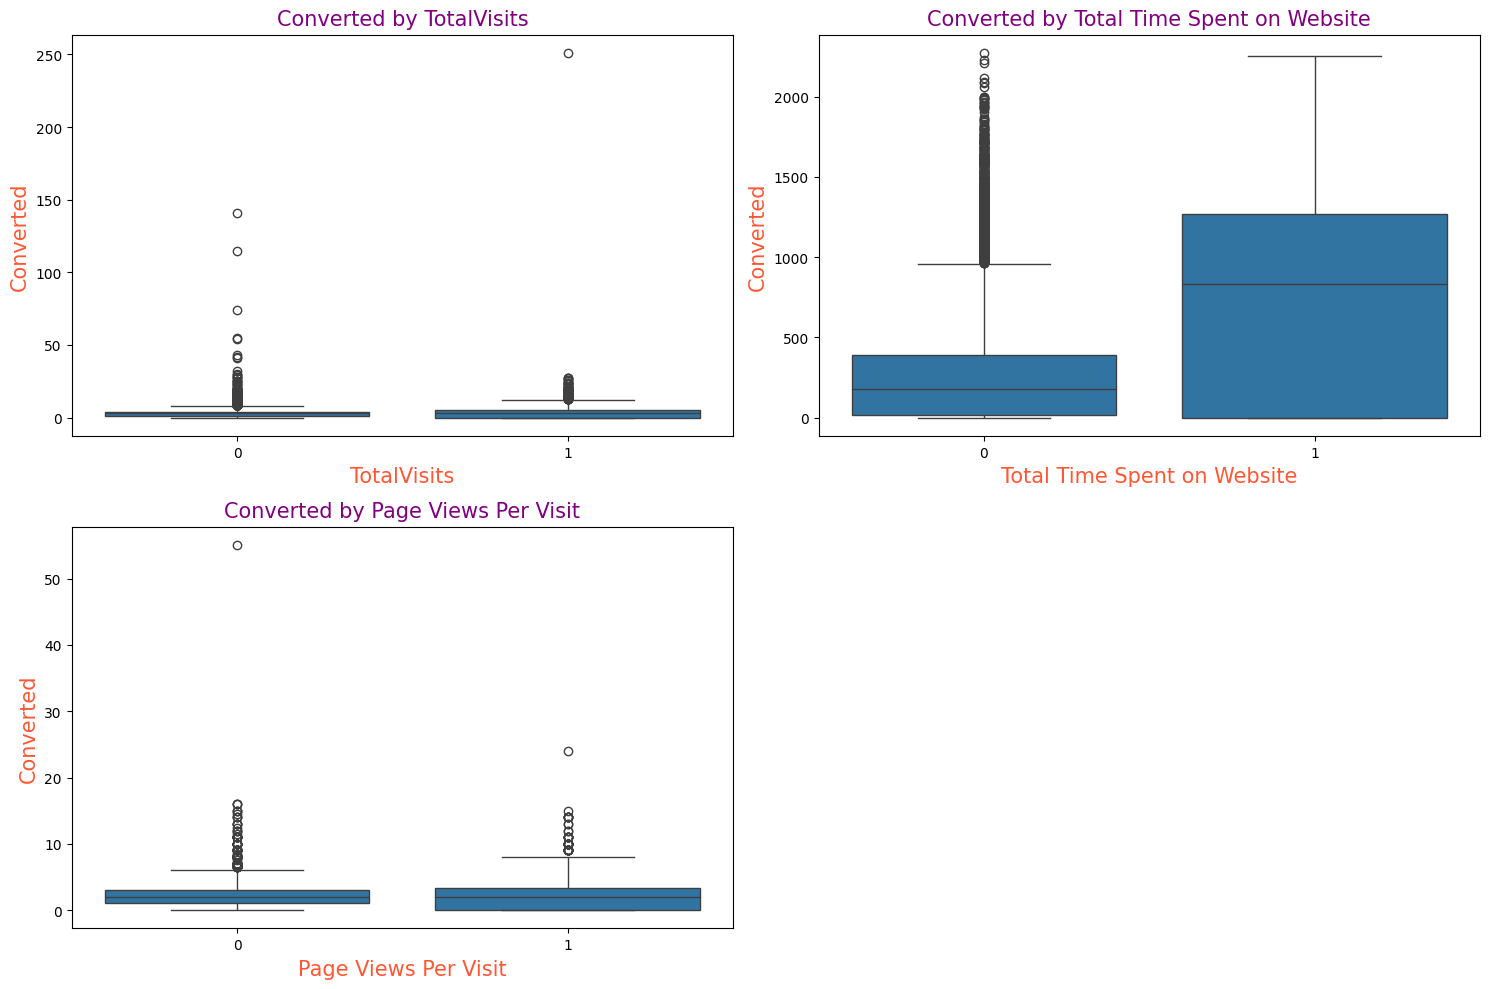

In [2619]:
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_plots = len(cols)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x='Converted', y=col, data=lead_dt, ax=axes[i])
    axes[i].set_title(f'Converted by {col}',
                     {'size': 15, 'weight': 20, 'color': '#800080'},
                     pad=7)
    axes[i].set_xlabel(col, {'size': 15, 'weight': 20, 'color': '#ff5733'}, labelpad = 5)
    axes[i].set_ylabel('Converted', {'size': 15, 'weight': 20, 'color': '#ff5733'}, labelpad = 4)
for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

***`As we can see there are a number of outliers in the data. We will cap the outliers at 1st and 99th percentiles for analysis.`***

In [2620]:
def cap_outliers(df, col, lower_percentile, upper_percentile):
    """Caps outliers in the given column of the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        col (str): The name of the column to cap.
        lower_percentile (float): The lower percentile to use for capping.
        upper_percentile (float): The upper percentile to use for capping.

    Returns:
        pd.DataFrame: The modified DataFrame.
    """

    lower_bound = df[col].quantile(lower_percentile)
    upper_bound = df[col].quantile(upper_percentile)

    df[col] = np.clip(df[col], lower_bound, upper_bound)

    return df

In [2621]:
for col in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    lead_dt = cap_outliers(lead_dt, col, 0.01, 0.99)

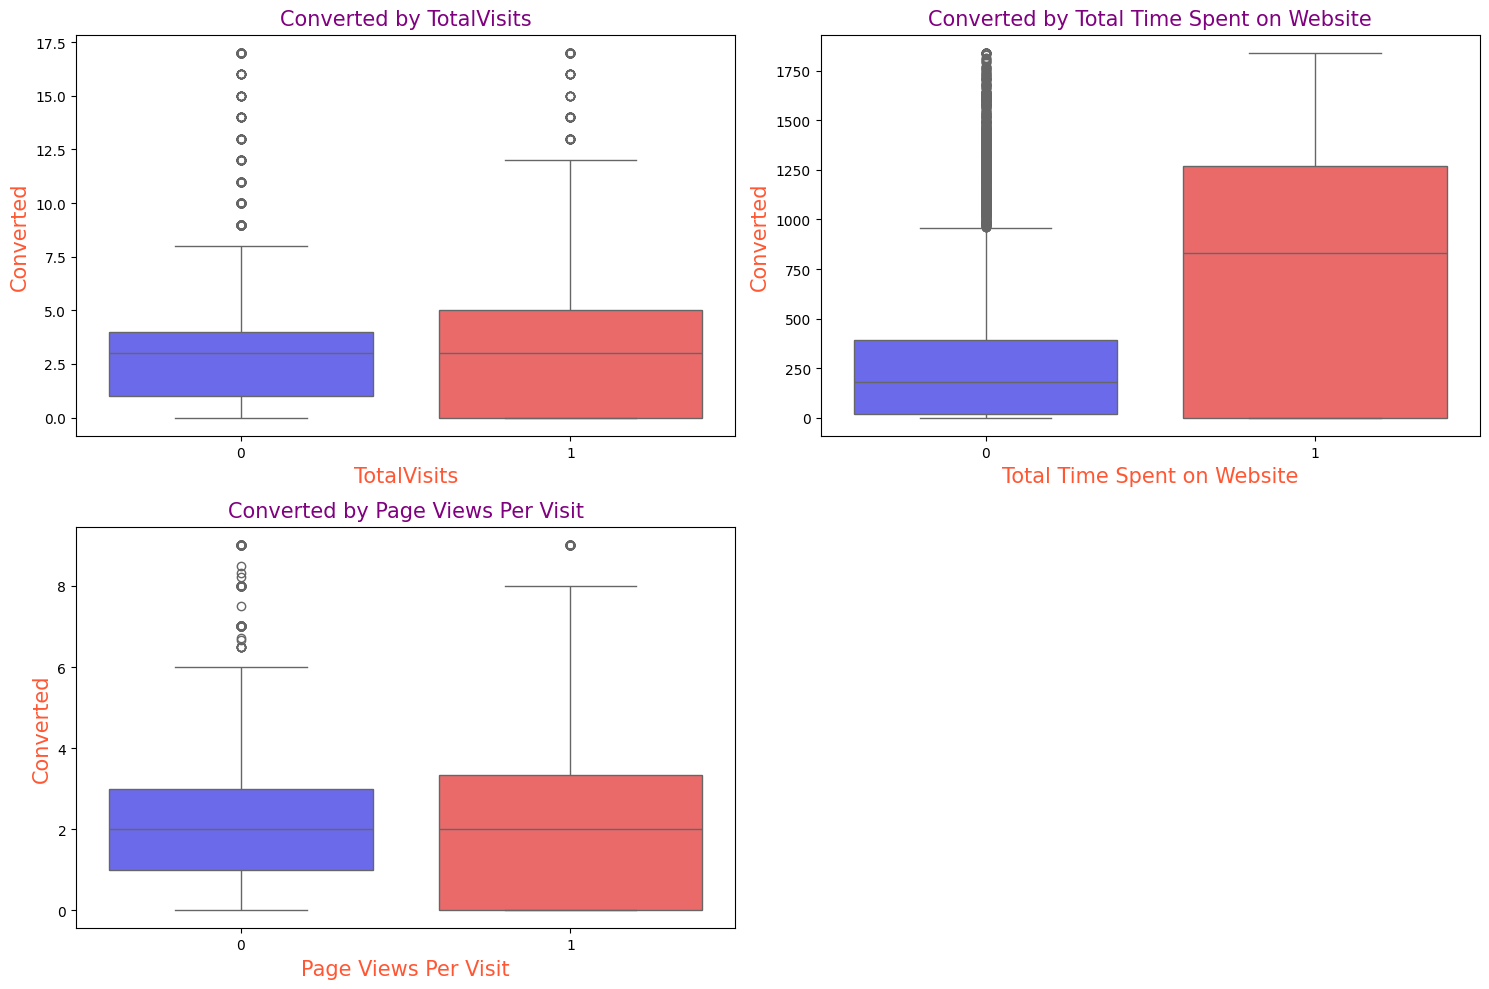

In [2622]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x='Converted', y=col, data=lead_dt, ax=axes[i], palette = "seismic")
    axes[i].set_title(f'Converted by {col}',
                     {'size': 15, 'weight': 20, 'color': '#800080'},
                     pad=7)
    axes[i].set_xlabel(col, {'size': 15, 'weight': 20, 'color': '#ff5733'}, labelpad = 5)
    axes[i].set_ylabel('Converted', {'size': 15, 'weight': 20, 'color': '#ff5733'}, labelpad = 4)
for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

***INSIGHTS ON TARGET VARIABLE VS NUMERICAL VARIABLES:-***

- *`TotalVisits and Page Views Per Visit show similar trend. Both converted and non-converted leads exhibit similar median visit counts. However, non-converted leads display highly frequent visits.`*


- *`In the Total Time Spent On Website graph, the average time spent on the website is substantially higher for the "Converted" group than the "Not Converted" group. The more time leads spend on the website, the higher the chances of them converting to customers.`*

***3.1.2 Categorical Columns***

***`Countplot for categorical colums`***

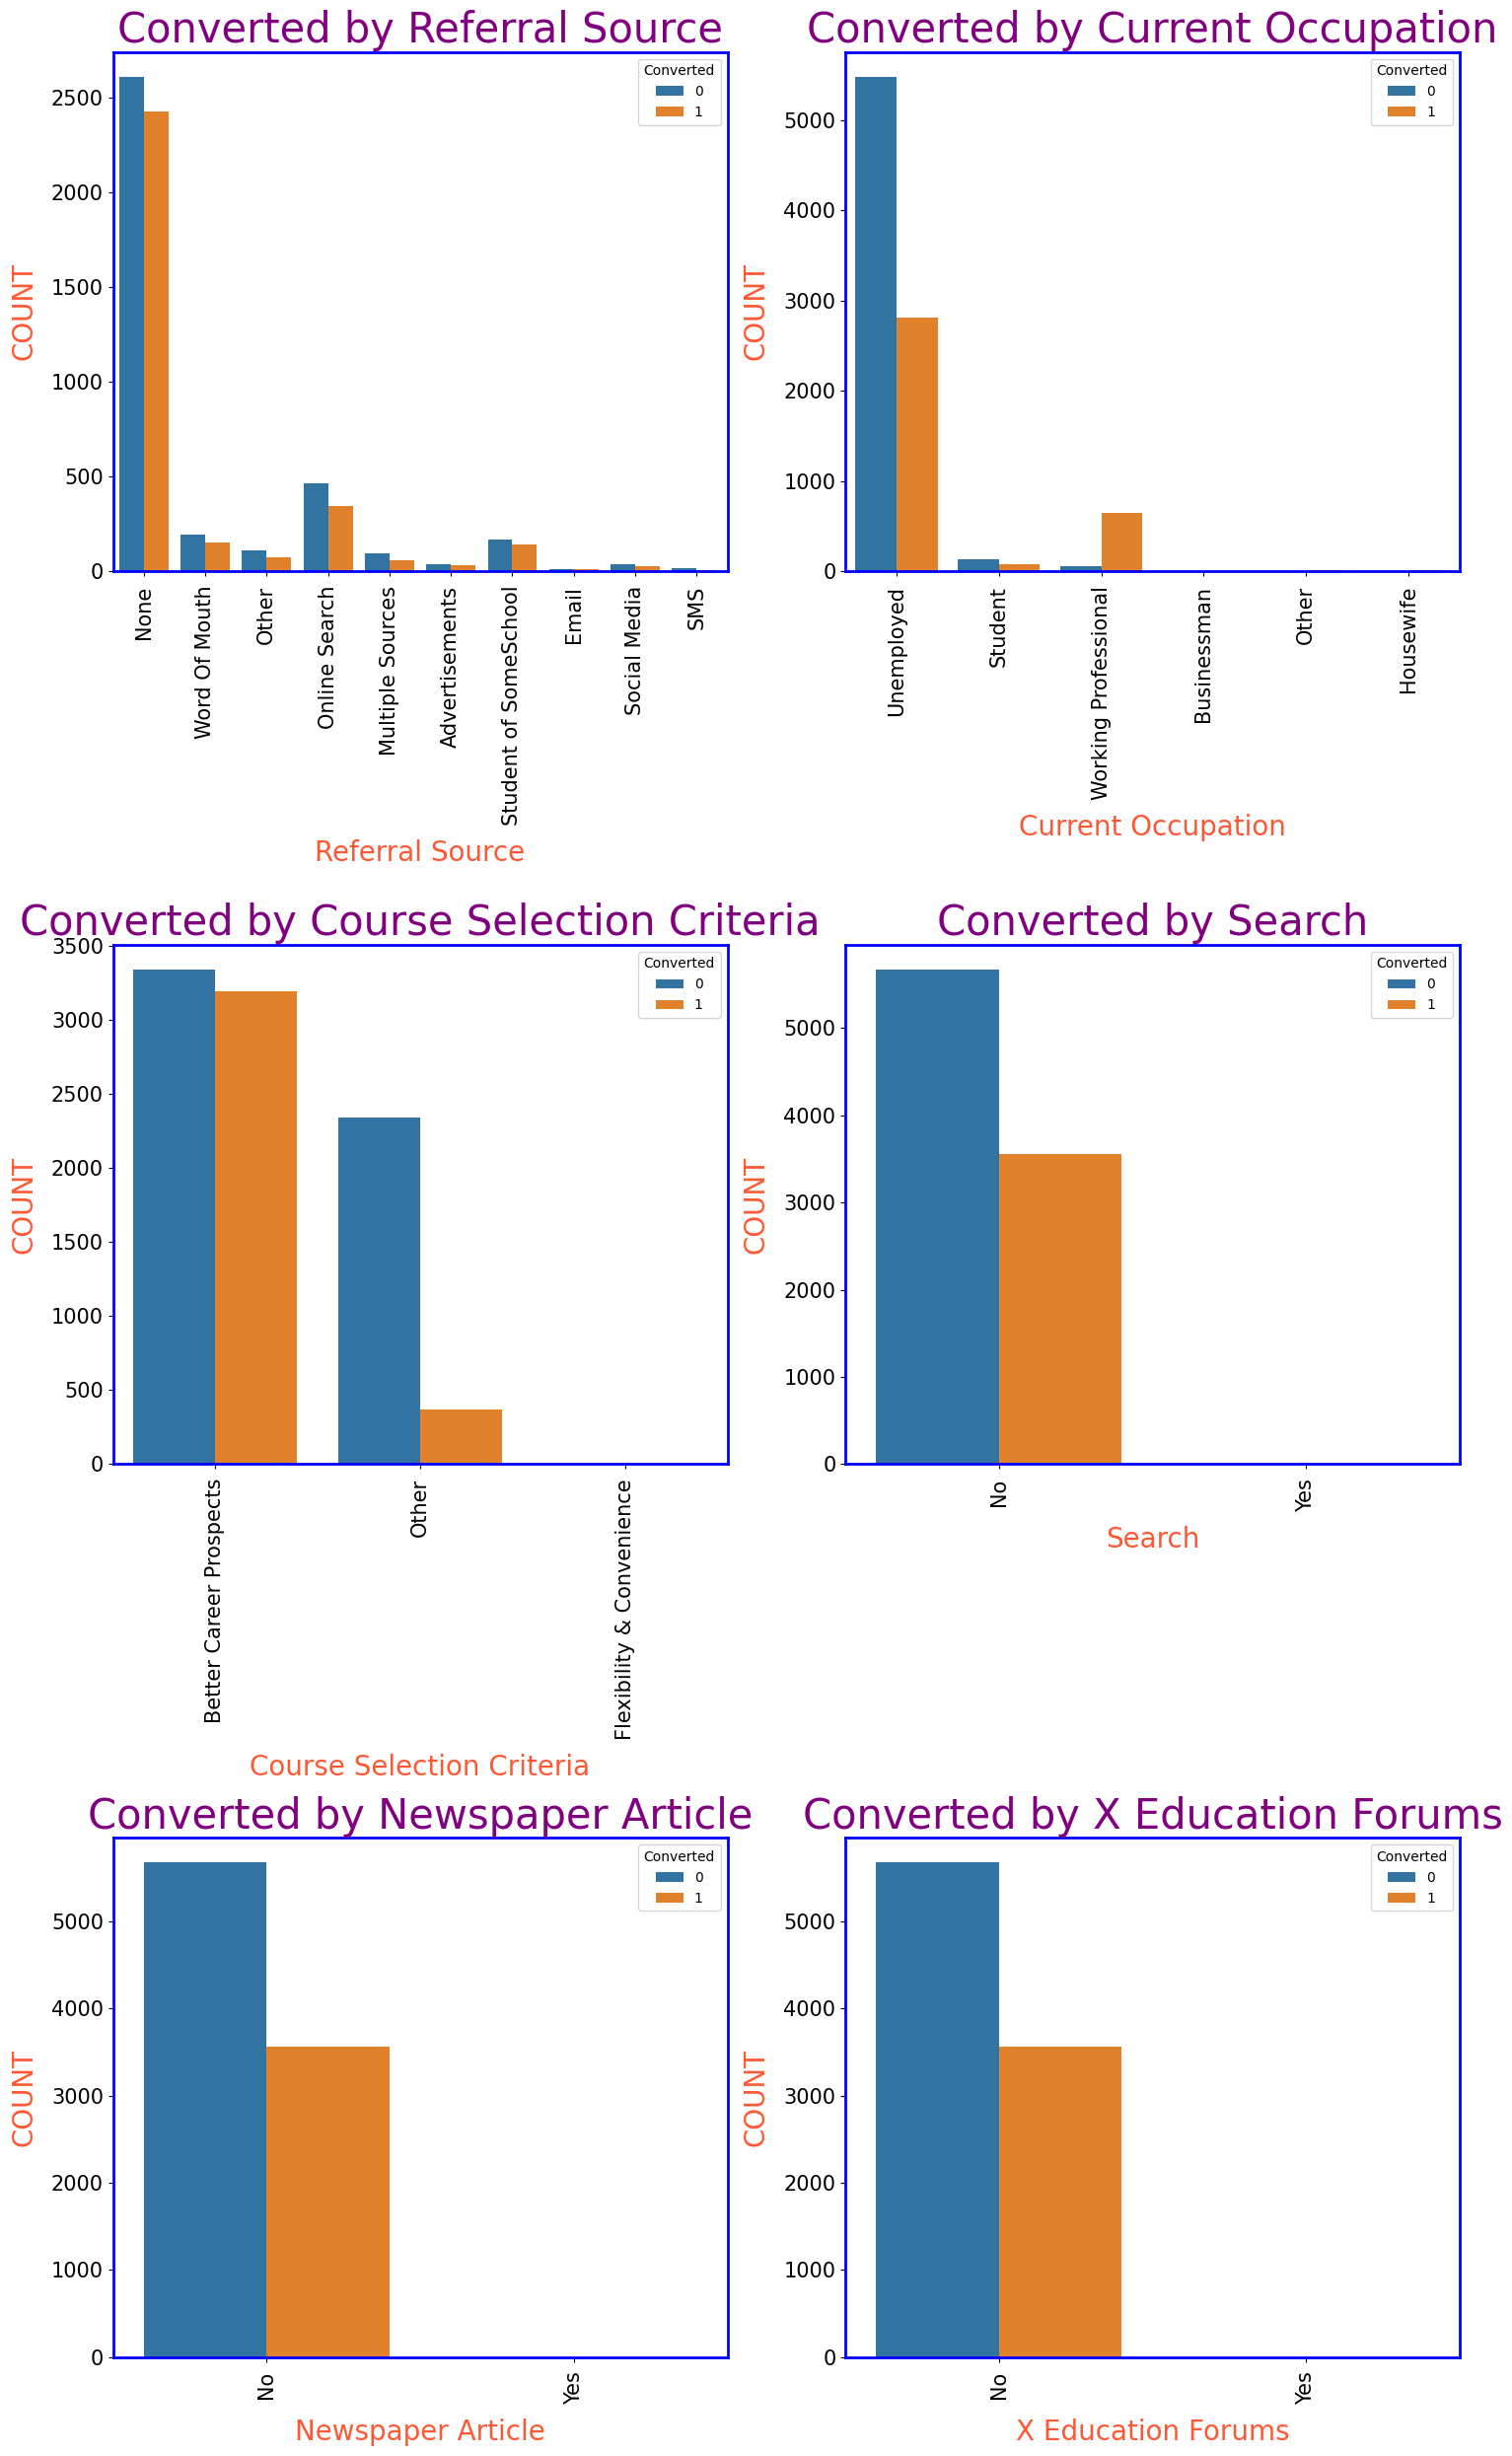

In [2623]:
cat_cols = ['Referral Source', 'Current Occupation', 'Course Selection Criteria',
            'Search', 'Newspaper Article', 'X Education Forums']
plt.figure(figsize = (15, 25))
for i in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'Converted', data = lead_dt)
    plt.title(f'Converted by {i[1]}', {'size': 30, 'weight': 20, 'color': '#800080'},
                     pad=7)
    plt.rcParams['axes.titlesize'] = 16
    plt.xlabel(i[1], {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.ylabel('COUNT', {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.xticks(rotation = 90)
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=15, pad=7)
    ax.yaxis.set_tick_params(labelsize=15)
    ax = plt.gca()
    for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_linewidth(2)
      ax.spines[spine].set_color('blue')
    plt.tight_layout()

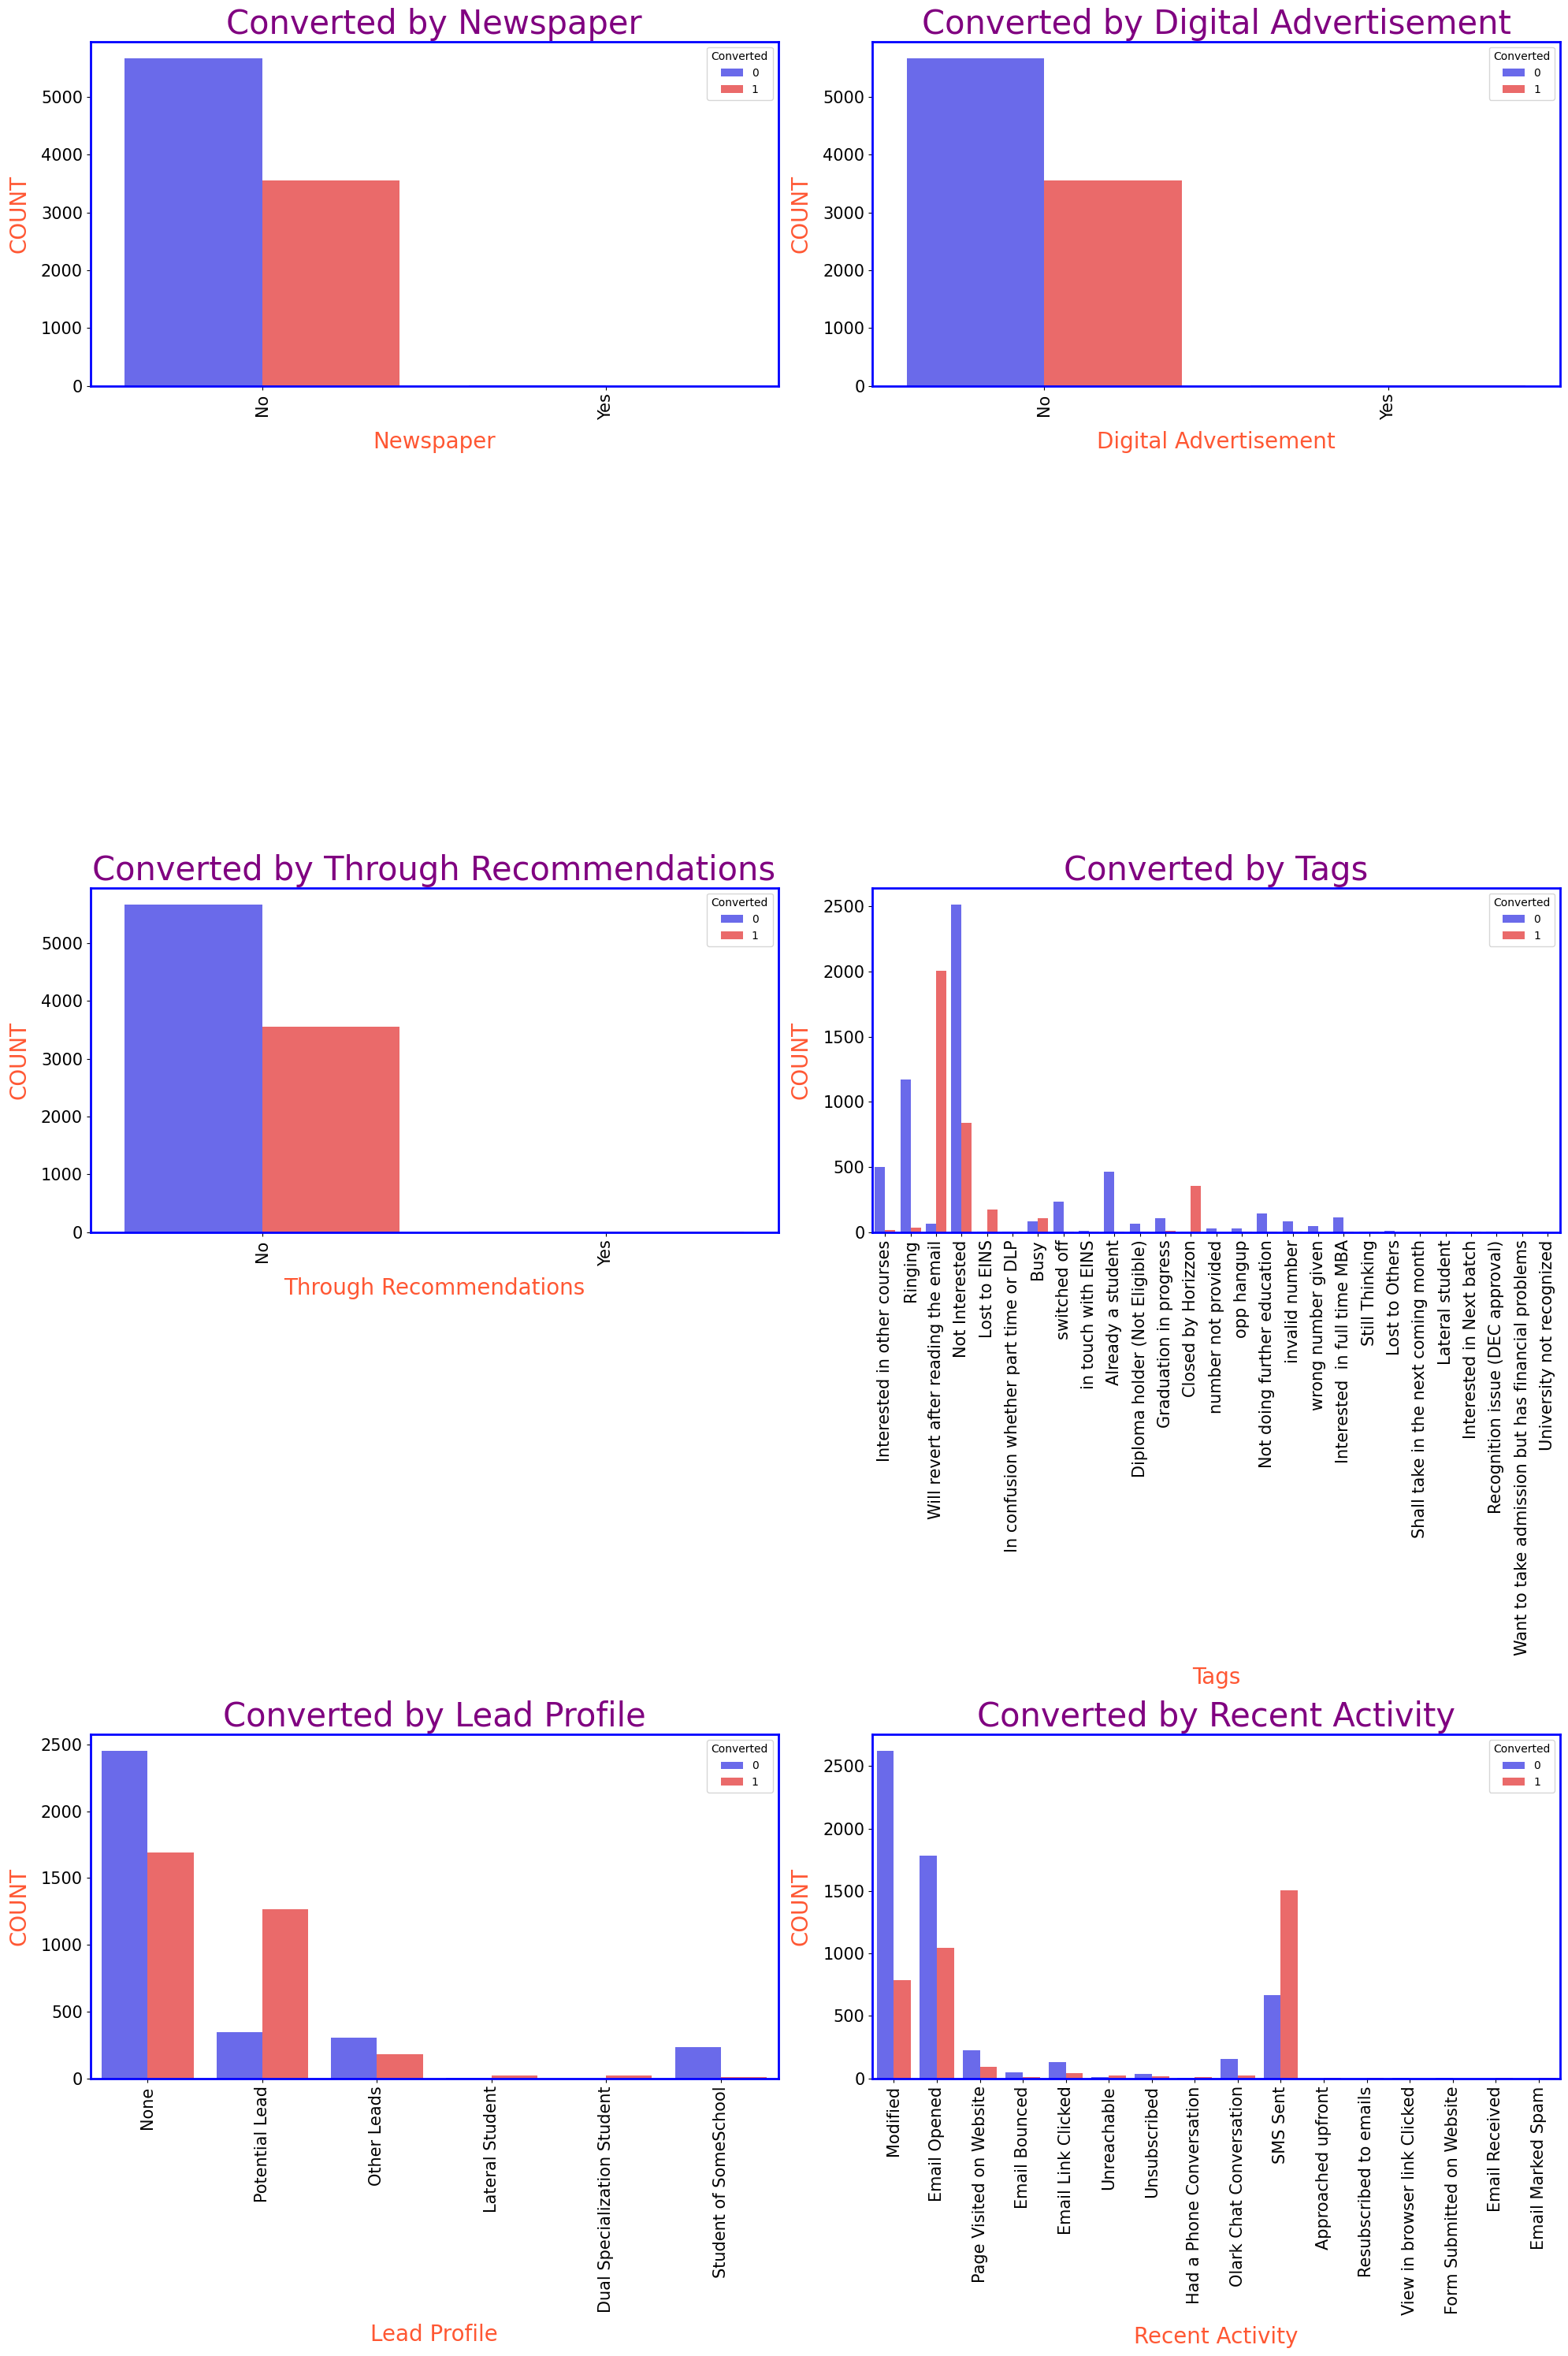

In [2624]:
cat_cols = ['Newspaper', 'Digital Advertisement', 'Through Recommendations',
            'Tags', 'Lead Profile', 'Recent Activity']
plt.figure(figsize = (20, 30))
for i in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1], hue='Converted', data=lead_dt, palette='seismic')
    plt.title(f'Converted by {i[1]}', {'size': 30, 'weight': 20, 'color': '#800080'},
                     pad=7)
    plt.rcParams['axes.titlesize'] = 16
    plt.xlabel(i[1], {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.ylabel('COUNT', {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.xticks(rotation = 90)
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax = plt.gca()
    for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_linewidth(2)
      ax.spines[spine].set_color('blue')
    plt.tight_layout()

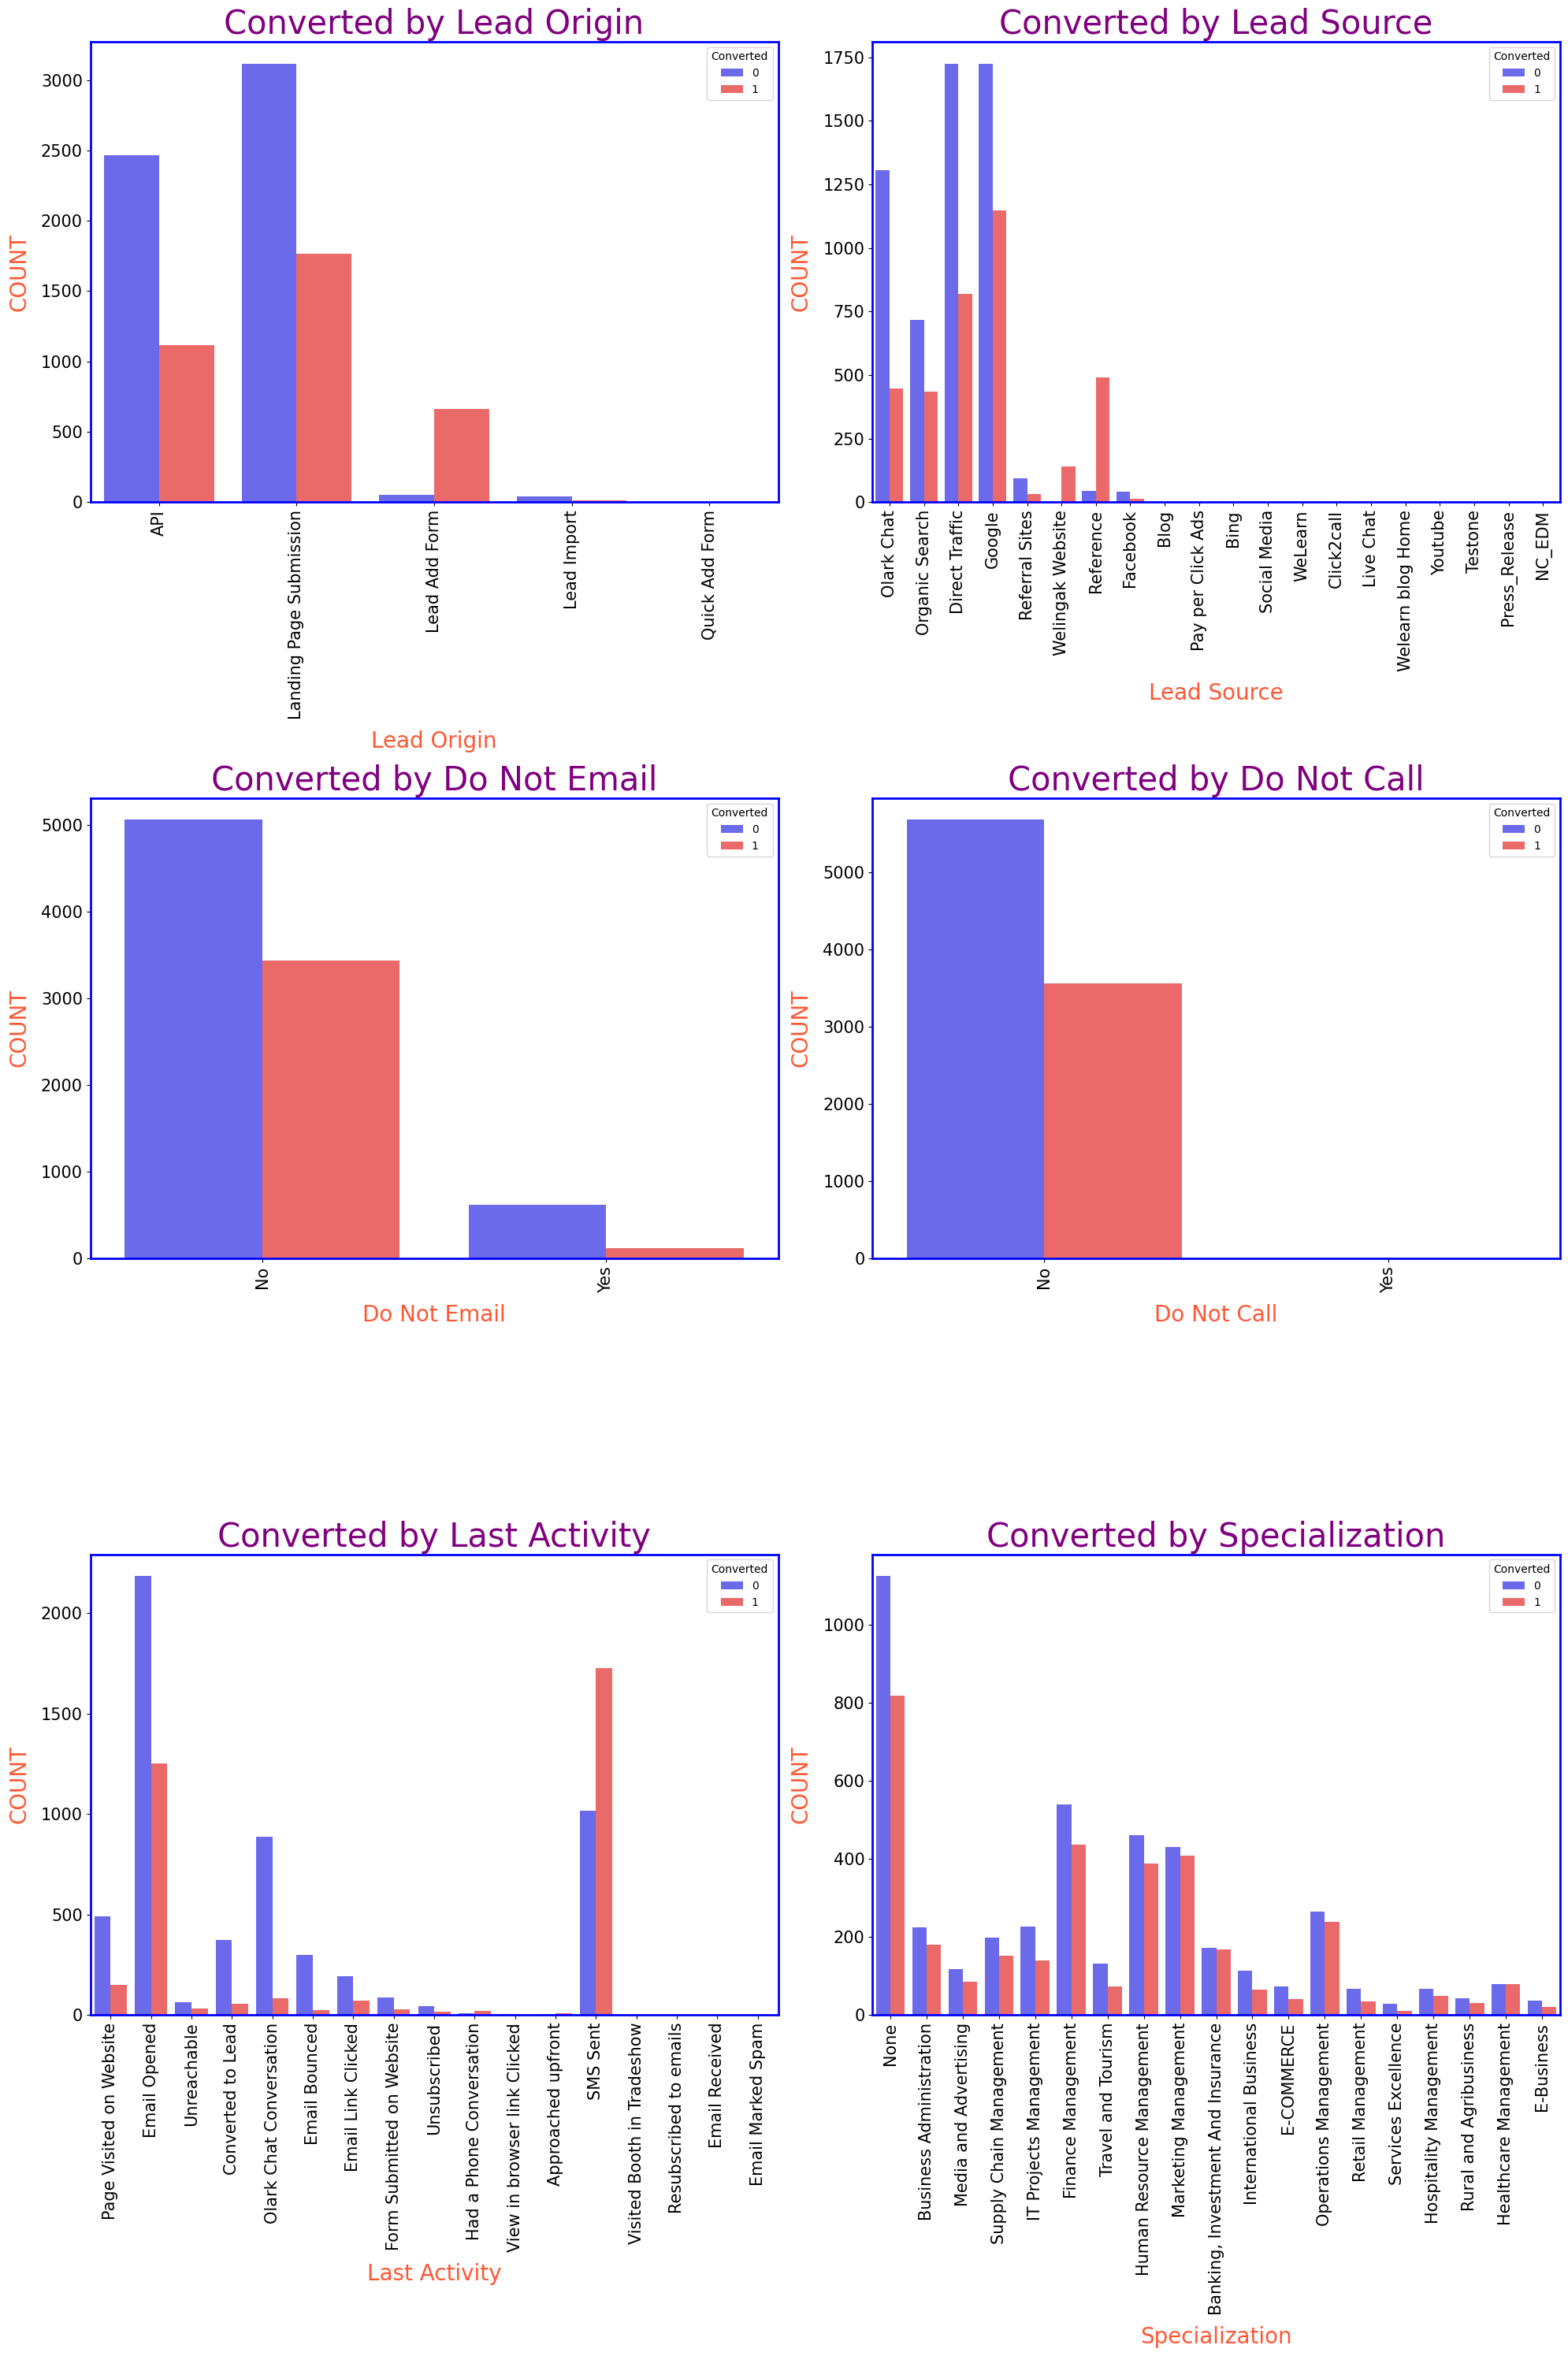

In [2625]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization']
plt.figure(figsize = (20, 30))
for i in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1], hue='Converted', data=lead_dt, palette='seismic')
    plt.title(f'Converted by {i[1]}', {'size': 30, 'weight': 20, 'color': '#800080'},
                     pad=7)
    plt.rcParams['axes.titlesize'] = 16
    plt.xlabel(i[1], {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.ylabel('COUNT', {'size': 20, 'weight': 20, 'color': '#ff5733'}, labelpad=10)
    plt.xticks(rotation = 90)
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax = plt.gca()
    for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_linewidth(2)
      ax.spines[spine].set_color('blue')
    plt.tight_layout()

In [2626]:
## Based on the univariate analysis we have seen that many columns are not
## adding any information to the model, hence we can drop them for further analysis.
lead_dt.drop(['Tags', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis =1, inplace=True)

***3.1.3 Dummy variables***

***`Creating Dummy Variables for categorical columns`***

In [2627]:
columns_to_dummy = ['Do Not Email', 'Do Not Call']
existing_columns = [col for col in columns_to_dummy if col in lead_dt.columns]
lead_dt = pd.get_dummies(data=lead_dt, columns=columns_to_dummy,
                         drop_first=True, dtype = "int64")

In [2628]:
lead_dt.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Referral Source,Current Occupation,Course Selection Criteria,Lead Profile,Recent Activity,Do Not Email_Yes,Do Not Call_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0.0,Page Visited on Website,None,None,Unemployed,Better Career Prospects,None,Modified,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5,674.0,2.5,Email Opened,None,None,Unemployed,Better Career Prospects,None,Email Opened,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2,1532.0,2.0,Email Opened,Business Administration,None,Student,Better Career Prospects,Potential Lead,Email Opened,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1,305.0,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,None,Modified,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2,1428.0,1.0,Converted to Lead,None,Other,Unemployed,Better Career Prospects,None,Modified,0,0


In [2629]:
list(lead_dt.columns)

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'Referral Source',
 'Current Occupation',
 'Course Selection Criteria',
 'Lead Profile',
 'Recent Activity',
 'Do Not Email_Yes',
 'Do Not Call_Yes']

In [2630]:
lead_dt.shape

(9240, 16)

In [2631]:
lead_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9240 non-null   object 
 1   Lead Origin                  9240 non-null   object 
 2   Lead Source                  9204 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   int64  
 5   Total Time Spent on Website  9240 non-null   float64
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9137 non-null   object 
 8   Specialization               7802 non-null   object 
 9   Referral Source              7033 non-null   object 
 10  Current Occupation           9240 non-null   object 
 11  Course Selection Criteria    9240 non-null   object 
 12  Lead Profile                 6531 non-null   object 
 13  Recent Activity   

In [2632]:
lead_dt.nunique()

,0
Prospect ID,9240
Lead Origin,5
Lead Source,20
Converted,2
TotalVisits,18
Total Time Spent on Website,1656
Page Views Per Visit,102
Last Activity,17
Specialization,19
Referral Source,10


***`Check correlation between predictor variables`***

In [2633]:
num_vars = ['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
            'Do Not Email_Yes', 'Do Not Call_Yes']
lead_dt[num_vars].corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes
Converted,1.000000,0.033704,0.363576,-0.015102,-0.135580,0.018581
TotalVisits,0.033704,1.000000,0.312818,0.711191,0.009231,0.005503
Total Time Spent on Website,0.363576,0.312818,1.000000,0.323125,-0.046534,0.006873
Page Views Per Visit,-0.015102,0.711191,0.323125,1.000000,0.023994,-0.005908
Do Not Email_Yes,-0.135580,0.009231,-0.046534,0.023994,1.000000,-0.004322
Do Not Call_Yes,0.018581,0.005503,0.006873,-0.005908,-0.004322,1.000000


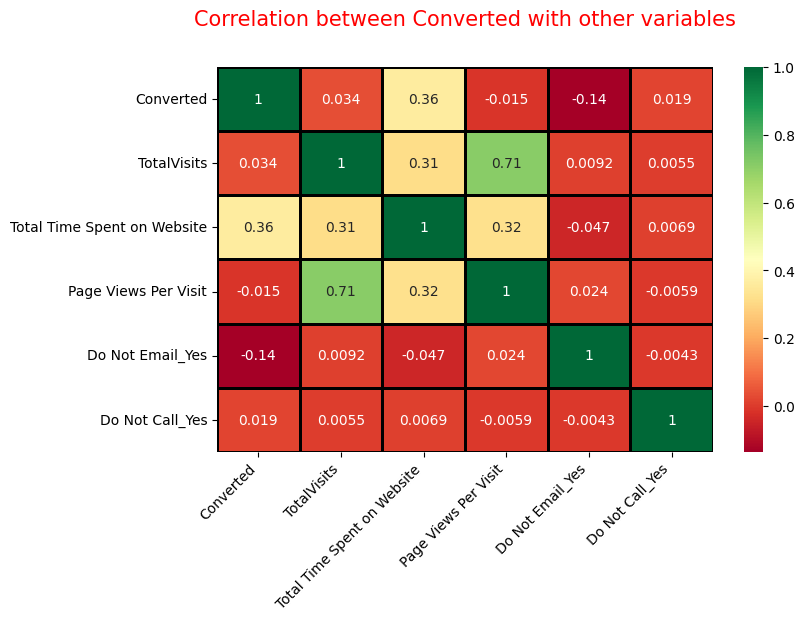

In [2634]:
plt.figure(figsize=(8, 5))
sns.heatmap(lead_dt[num_vars].corr(), annot=True, cmap= "RdYlGn", linewidths=1, linecolor='black')
plt.title("Correlation between Converted with other variables", fontdict={"fontsize":15, 'color': 'r'}, pad=30)
plt.xticks(rotation=45, ha='right')
plt.show()

***INSIGHTS:-***
- ***`From Heatmap, we understood that:`***
    - *`Target variable 'Converted' has positive correlation with 'Total Time Spent on Website'(0.36), 'TotalVists'(0.034) and'Do Not Call_Yes'(0.019).`*
    - *`Target variable 'Converted' has negative correlation with 'Page Views Per Visit'(-0.015) and 'Do Not Email_Yes'(-0.014).`*

In [2635]:
columns_to_dummy = ['Lead Origin', 'Lead Source',
                    'Last Activity', 'Specialization', 'Referral Source',
                    'Current Occupation', 'Course Selection Criteria',
                    'Lead Profile', 'Recent Activity']
existing_columns = [col for col in columns_to_dummy if col in lead_dt.columns]
lead_dt = pd.get_dummies(data=lead_dt, columns=columns_to_dummy,
                         drop_first=True, dtype = "int64")

In [2636]:
lead_dt.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Testone,Lead Source_WeLearn,Lead Source_Welearn blog Home,Lead Source_Welingak Website,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_None,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Referral Source_Email,Referral Source_Multiple Sources,Referral Source_None,Referral Source_Online Search,Referral Source_Other,Referral Source_SMS,Referral Source_Social Media,Referral Source_Student of SomeSchool,Referral Source_Word Of Mouth,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Selection Criteria_Flexibility & Convenience,Course Selection Criteria_Other,Lead Profile_Lateral Student,Lead Profile_None,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Recent Activity_Email Bounced,Recent Activity_Email Link Clicked,Recent Activity_Email Marked Spam,Recent Activity_Email Opened,Recent Activity_Email Received,Recent Activity_Form Submitted on Website,Recent Activity_Had a Phone Conversation,Recent Activity_Modified,Recent Activity_Olark Chat Conversation,Recent Activity_Page Visited on Website,Recent Activity_Resubscribed to emails,Recent Activity_SMS Sent,Recent Activity_Unreachable,Recent Activity_Unsubscribed,Recent Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2,1532.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,305.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2,1428.0,1.0,0,0,1,0,0,0

In [2637]:
lead_dt.columns

Index(['Prospect ID', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Do Not Email_Yes', 'Do Not Call_Yes', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Blog', 'Lead Source_Click2call', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_Testone', 'Lead Source_WeLearn', 'Lead Source_Welearn blog Home', 'Lead Source_Welingak Website', 'Lead Source_Youtube', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form S

In [2638]:
lead_dt.shape

(9240, 100)

# **4. Model Building**

***4.1 TEST-TRAIN DATA SPLIT***

In [2639]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2640]:
## Putting feature variable to X
X = lead_dt.drop(['Converted', 'Prospect ID'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Testone,Lead Source_WeLearn,Lead Source_Welearn blog Home,Lead Source_Welingak Website,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_None,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Referral Source_Email,Referral Source_Multiple Sources,Referral Source_None,Referral Source_Online Search,Referral Source_Other,Referral Source_SMS,Referral Source_Social Media,Referral Source_Student of SomeSchool,Referral Source_Word Of Mouth,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Selection Criteria_Flexibility & Convenience,Course Selection Criteria_Other,Lead Profile_Lateral Student,Lead Profile_None,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Recent Activity_Email Bounced,Recent Activity_Email Link Clicked,Recent Activity_Email Marked Spam,Recent Activity_Email Opened,Recent Activity_Email Received,Recent Activity_Form Submitted on Website,Recent Activity_Had a Phone Conversation,Recent Activity_Modified,Recent Activity_Olark Chat Conversation,Recent Activity_Page Visited on Website,Recent Activity_Resubscribed to emails,Recent Activity_SMS Sent,Recent Activity_Unreachable,Recent Activity_Unsubscribed,Recent Activity_View in browser link Clicked
0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,1532.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,305.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,1428.0,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2641]:
X.shape

(9240, 98)

In [2642]:
## Putting response variable to y
y = lead_dt['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [2643]:
y.shape

(9240,)

In [2644]:
## Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

***4.2 RESCALING THE FEATURES***


- *`There are two common ways of rescaling:`*

  *`1. Min-Max scaling `*

  *`2. Standardisation (mean-0, sigma-1)`*

- *`We will use Standardisation.`*

In [2645]:
## Apply StandardScaler() to numerical columns except 'category' and 'dummy' variables.
scaler = StandardScaler()
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Testone,Lead Source_WeLearn,Lead Source_Welearn blog Home,Lead Source_Welingak Website,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_None,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Referral Source_Email,Referral Source_Multiple Sources,Referral Source_None,Referral Source_Online Search,Referral Source_Other,Referral Source_SMS,Referral Source_Social Media,Referral Source_Student of SomeSchool,Referral Source_Word Of Mouth,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Selection Criteria_Flexibility & Convenience,Course Selection Criteria_Other,Lead Profile_Lateral Student,Lead Profile_None,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Recent Activity_Email Bounced,Recent Activity_Email Link Clicked,Recent Activity_Email Marked Spam,Recent Activity_Email Opened,Recent Activity_Email Received,Recent Activity_Form Submitted on Website,Recent Activity_Had a Phone Conversation,Recent Activity_Modified,Recent Activity_Olark Chat Conversation,Recent Activity_Page Visited on Website,Recent Activity_Resubscribed to emails,Recent Activity_SMS Sent,Recent Activity_Unreachable,Recent Activity_Unsubscribed,Recent Activity_View in browser link Clicked
1871,-1.000699,-0.888014,-1.153026,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.217773,0.007668,-0.482827,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.522390,-0.693060,0.106746,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.522390,1.374181,1.366519,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.000699,-0.888014,-1.153026,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,

In [2646]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Do Not Email_Yes', 'Do Not Call_Yes', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Blog', 'Lead Source_Click2call', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_Testone', 'Lead Source_WeLearn', 'Lead Source_Welearn blog Home', 'Lead Source_Welingak Website', 'Lead Source_Youtube', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website',
       'Last 

In [2647]:
_## Logistic Regression Model
logreg = LogisticRegression()

## RFE Calculations
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [2648]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 19),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 31),
 ('Lead Source_Blog', False, 55),
 ('Lead Source_Click2call', False, 6),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 53),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_Testone', False, 78),
 ('Lead Source_WeLearn', False, 62),
 ('Lead S

In [2649]:
col = X_train.columns[rfe.support_]
list(col)

['Total Time Spent on Website',
 'Do Not Email_Yes',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_SMS Sent',
 'Specialization_Hospitality Management',
 'Current Occupation_Housewife',
 'Current Occupation_Working Professional',
 'Course Selection Criteria_Other',
 'Lead Profile_Lateral Student',
 'Lead Profile_Potential Lead',
 'Lead Profile_Student of SomeSchool',
 'Recent Activity_Email Opened',
 'Recent Activity_Had a Phone Conversation',
 'Recent Activity_Modified',
 'Recent Activity_Olark Chat Conversation',
 'Recent Activity_Unreachable']

***4.3 ASSESSING THE MODEL WITH STATSMODELS***

**MODEL 1**

 - *`HIGH P-VALUE, HIGH VIF - Drop these variables`*
 - *`HIGH-LOW`*
   - *`HIGH P-VALUE, LOW VIF (Remove these first)`*
   - *`LOW P-VALUE, HIGH VIF (Remove these after the ones above)`*
 - *`LOW P-VALUE, LOW VIF - Keep these variables`*


In [2650]:
## Add a constant
X_train_sm = sm.add_constant(X_train[col])

## Create a first fitted model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

## Summary of the Logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2446.6
Date:                Mon, 16 Dec 2024   Deviance:                       4893.2
Time:                        12:37:44   Pearson chi2:                 7.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4361
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [2651]:
## VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Opened,7.18
15,Recent Activity_Email Opened,7.18
6,Last Activity_Had a Phone Conversation,2.04
16,Recent Activity_Had a Phone Conversation,2.02
17,Recent Activity_Modified,1.87
11,Course Selection Criteria_Other,1.70
2,Lead Origin_Lead Add Form,1.58
3,Lead Source_Olark Chat,1.53
13,Lead Profile_Potential Lead,1.51
7,Last Activity_SMS Sent,1.30


*`We will remove 'Recent Activity_Had a Phone Conversation' due to its very high p-value (0.222 > 0.05).`*

**MODEL 2**

 ***` Dropping the 'Recent Activity_Had a Phone Conversation' and updating the model`***

In [2652]:
col = col.drop("Recent Activity_Had a Phone Conversation", 1)
col

Index(['Total Time Spent on Website', 'Do Not Email_Yes', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Current Occupation_Housewife', 'Current Occupation_Working Professional', 'Course Selection Criteria_Other', 'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool', 'Recent Activity_Email Opened', 'Recent Activity_Modified', 'Recent Activity_Olark Chat Conversation', 'Recent Activity_Unreachable'], dtype='object')

In [2653]:
## Add a constant
X_train_sm = sm.add_constant(X_train[col])

## Create a first fitted model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

## Summary of the Logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2447.4
Date:                Mon, 16 Dec 2024   Deviance:                       4894.8
Time:                        12:37:45   Pearson chi2:                 7.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4359
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [2654]:
## VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Opened,7.18
15,Recent Activity_Email Opened,7.17
16,Recent Activity_Modified,1.86
11,Course Selection Criteria_Other,1.70
2,Lead Origin_Lead Add Form,1.58
3,Lead Source_Olark Chat,1.53
13,Lead Profile_Potential Lead,1.50
7,Last Activity_SMS Sent,1.30
0,Total Time Spent on Website,1.26
4,Lead Source_Welingak Website,1.26


*`We will remove 'Current Occupation_Housewife' due to its very high p-value (0.999 > 0.05).`*

**MODEL 3**

***` Dropping the 'Current Occupation_Housewife' and updating the model`***

In [2655]:
col = col.drop("Current Occupation_Housewife", 1)
X_train[col].columns

Index(['Total Time Spent on Website', 'Do Not Email_Yes', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Current Occupation_Working Professional', 'Course Selection Criteria_Other', 'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool', 'Recent Activity_Email Opened', 'Recent Activity_Modified', 'Recent Activity_Olark Chat Conversation', 'Recent Activity_Unreachable'], dtype='object')

In [2656]:
## Add a constant
X_train_sm = sm.add_constant(X_train[col])

## Create a first fitted model
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

## Summary of the Logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.6
Date:                Mon, 16 Dec 2024   Deviance:                       4909.1
Time:                        12:37:45   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4347
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [2657]:
## VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Opened,7.18
14,Recent Activity_Email Opened,7.17
15,Recent Activity_Modified,1.86
10,Course Selection Criteria_Other,1.70
2,Lead Origin_Lead Add Form,1.58
3,Lead Source_Olark Chat,1.53
12,Lead Profile_Potential Lead,1.50
7,Last Activity_SMS Sent,1.30
0,Total Time Spent on Website,1.26
4,Lead Source_Welingak Website,1.26


*`We will remove 'Recent Activity_Email Opened' due to its very high VIF value (7.18 > 5).`*


**MODEL 4**

***` Dropping the 'Recent Activity_Email Opened' and updating the model`***

In [2658]:
col = col.drop("Recent Activity_Email Opened", 1)
X_train[col].columns

Index(['Total Time Spent on Website', 'Do Not Email_Yes', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management', 'Current Occupation_Working Professional', 'Course Selection Criteria_Other', 'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool', 'Recent Activity_Modified', 'Recent Activity_Olark Chat Conversation', 'Recent Activity_Unreachable'], dtype='object')

In [2659]:
## Create a first fitted model
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

## Summary of the Logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2462.8
Date:                Mon, 16 Dec 2024   Deviance:                       4925.5
Time:                        12:37:46   Pearson chi2:                 7.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4332
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [2660]:
## VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Course Selection Criteria_Other,1.65
2,Lead Origin_Lead Add Form,1.58
3,Lead Source_Olark Chat,1.52
12,Lead Profile_Potential Lead,1.50
14,Recent Activity_Modified,1.49
5,Last Activity_Email Opened,1.35
7,Last Activity_SMS Sent,1.30
0,Total Time Spent on Website,1.26
4,Lead Source_Welingak Website,1.26
9,Current Occupation_Working Professional,1.24


*`Since the P-values  and VIF values are low for all the variables, model-4 is our final model.`*

In [2661]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
1871,0.298535
6795,0.234803
3516,0.345380
8105,0.811918
3934,0.160707
4844,0.997134
3297,0.119593
8071,0.998425
987,0.071213
7423,0.974297


In [2662]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29853489, 0.23480301, 0.34537994, 0.81191827, 0.16070674,
       0.99713415, 0.11959325, 0.99842479, 0.07121304, 0.97429651])

In [2663]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.298535,1871
1,0,0.234803,6795
2,0,0.345380,3516
3,0,0.811918,8105
4,0,0.160707,3934


In [2664]:
## Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.298535,1871,0
1,0,0.234803,6795,0
2,0,0.345380,3516,0
3,0,0.811918,8105,1
4,0,0.160707,3934,0


In [2665]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_matrix)

[[3573  429]
 [ 665 1801]]


In [2666]:
# The confusion matrix
# Predicted     not_converted    converted
# Actual
# not_converted        3577      425
# converted            665       1001

In [2667]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8308596165739023


***4.4 METRICS BEYOND SIMPLY ACCURACY***

In [2668]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [2669]:
## Sensitivity
TP / float(TP+FN)

0.7303325223033252

In [2670]:
## Specificity
TN / float(TN+FP)

0.8928035982008995

In [2671]:
# False Postive Rate
print(FP/ float(TN+FP))

0.10719640179910045


In [2672]:
# False Negative Rate
print(FN/ float(TP+FN))

0.26966747769667476


In [2673]:
## Positive Predictive Value
print (TP / float(TP+FP))

0.8076233183856503


In [2674]:
## Negative Predictive Value
print (TN / float(TN+ FN))

0.8430863614912695


***4.5 PLOTTING THE ROC CURVE***

***An ROC curve demonstrates several things:-***

- *`It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).`*


- *`The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.`*

- *`The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.`*

In [2675]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2676]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

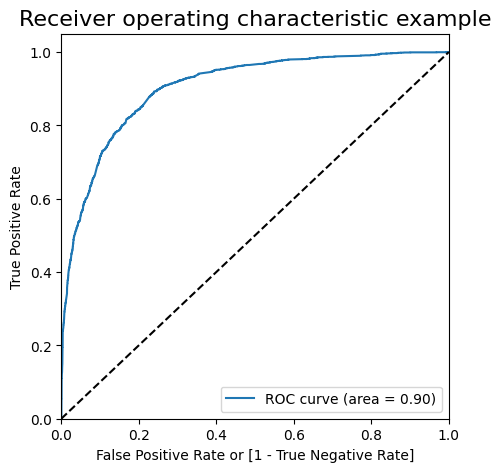

In [2677]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

***` Since we have higher (0.90) area under the ROC curve , therefore our model is a good one.`***

***4.6 FINDING OPTIMAL CUTOFF POINT***

***` Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.`***

In [2678]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.298535,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.234803,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.345380,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.811918,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.160707,3934,0,1,1,0,0,0,0,0,0,0,0


In [2679]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.655071  0.972830  0.459270
0.2   0.2  0.784477  0.918897  0.701649
0.3   0.3  0.814162  0.854826  0.789105
0.4   0.4  0.827922  0.784672  0.854573
0.5   0.5  0.830860  0.730333  0.892804
0.6   0.6  0.816017  0.646391  0.920540
0.7   0.7  0.802103  0.570154  0.945027
0.8   0.8  0.778757  0.467964  0.970265
0.9   0.9  0.731911  0.314274  0.989255


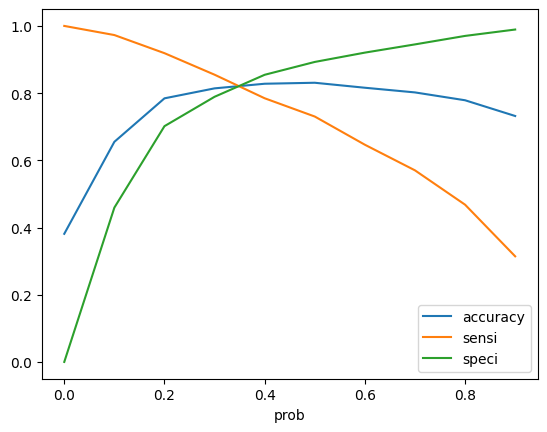

In [2680]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

***` From the curve above, 0.37 is the optimum point to take it as a cutoff probability.`***

In [2681]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.298535,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.234803,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.345380,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.811918,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.160707,3934,0,1,1,0,0,0,0,0,0,0,0,0


***`Assigning Lead Score to the Training data`***

In [2682]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.298535,1871,0,1,1,1,0,0,0,0,0,0,0,0,30
1,0,0.234803,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.345380,3516,0,1,1,1,1,0,0,0,0,0,0,0,35
3,0,0.811918,8105,1,1,1,1,1,1,1,1,1,1,0,1,81
4,0,0.160707,3934,0,1,1,0,0,0,0,0,0,0,0,0,16


In [2683]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8239022881880025


In [2684]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3343,  659],
       [ 480, 1986]])

In [2685]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2686]:
## Sensitivity
TP / float(TP+FN)

0.805352798053528

In [2687]:
## Specificity
TN / float(TN+FP)

0.8353323338330835

In [2688]:
# False Postive Rate
print(FP/ float(TN+FP))

0.16466766616691655


In [2689]:
# False Negative Rate
print(FN/ float(TP+FN))

0.19464720194647203


In [2690]:
## Positive Predictive Value
print (TP / float(TP+FP))

0.7508506616257089


In [2691]:
## Negative Predictive Value
print (TN / float(TN+ FN))

0.8744441538059116


***4.7 PRECISION AND RECALL***

In [2692]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3573,  429],
       [ 665, 1801]])

In [2693]:
## Precision = TP/TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8076233183856503

In [2694]:
## Recall = TP/TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7303325223033252

In [2695]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8076233183856503

In [2696]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7303325223033252

In [2697]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [2698]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

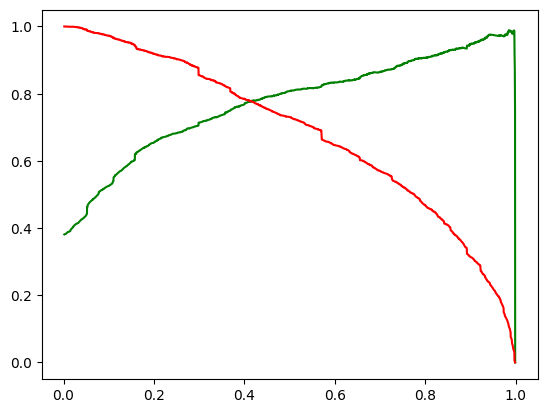

In [2699]:
## plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

***`Results :`***

***`Train Data:`***

 - *`Accuracy : 82.3 %`*
 - *`Sensitivity : 80.5 %`*
 - *`Specificity : 83.5 %`*

***4.8 MAKING PREDICTIONS ON THE TEST SET***

In [2700]:
## Scale the numerical features in the test set
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

## Subset the test dataset to the relevant columns
col1 = col
X_test = X_test[col1]
X_test.head()


,Total Time Spent on Website,Do Not Email_Yes,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Current Occupation_Working Professional,Course Selection Criteria_Other,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Recent Activity_Modified,Recent Activity_Olark Chat Conversation,Recent Activity_Unreachable
4269,0.971400,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2376,-0.888014,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7766,-0.779502,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9199,-0.888014,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4359,-0.888014,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [2701]:
## Add a constant to the test set
X_test_sm = sm.add_constant(X_test[col1])
X_test_sm.shape
list(X_test_sm.columns)


['const',
 'Total Time Spent on Website',
 'Do Not Email_Yes',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_SMS Sent',
 'Specialization_Hospitality Management',
 'Current Occupation_Working Professional',
 'Course Selection Criteria_Other',
 'Lead Profile_Lateral Student',
 'Lead Profile_Potential Lead',
 'Lead Profile_Student of SomeSchool',
 'Recent Activity_Modified',
 'Recent Activity_Olark Chat Conversation',
 'Recent Activity_Unreachable']

In [2702]:
## Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
4269,0.549325
2376,0.892122
7766,0.847267
9199,0.357135
4359,0.922183
9186,0.846486
1631,0.799378
8963,0.468096
8007,0.028666
5324,0.330374


In [2703]:
## Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2704]:
y_pred_1.head()

,0
4269,0.549325
2376,0.892122
7766,0.847267
9199,0.357135
4359,0.922183


In [2705]:
## Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2706]:
## Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [2707]:
## Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2708]:
## Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2709]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.549325
1,1,2376,0.892122
2,1,7766,0.847267
3,0,9199,0.357135
4,1,4359,0.922183


In [2710]:
## Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [2711]:
## Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['LeadID','Converted','Converted_Prob'])

In [2712]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,4269,1,0.549325
1,2376,1,0.892122
2,7766,1,0.847267
3,9199,0,0.357135
4,4359,1,0.922183


In [2713]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,4269,1,0.549325,1
1,2376,1,0.892122,1
2,7766,1,0.847267,1
3,9199,0,0.357135,0
4,4359,1,0.922183,1


In [2714]:
#@ Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8275613275613276

In [2715]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_matrix

array([[1421,  256],
       [ 222,  873]])

In [2716]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [2717]:
## Sensitivity
TP / float(TP+FN)

0.7972602739726027

In [2718]:
## Specificity
TN / float(TN+FP)

0.8473464519976148

***`Assigning Lead Score to the Testing data`***

In [2719]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.549325,1,55
1,2376,1,0.892122,1,89
2,7766,1,0.847267,1,85
3,9199,0,0.357135,0,36
4,4359,1,0.922183,1,92


***Results :***

 ***`Test Data:`***

 - *`Accuracy : 82.7 %`*
 - *`Sensitivity : 79.7 %`*
 - *`Specificity : 84.7 %`*

***Comparing the values obtained for Train & Test:***

***`Train Data:`***

 - *`Accuracy : 82.3 %`*
 - *`Sensitivity : 80.5 %`*
 - *`Specificity : 83.5 %`*


 ***`Test Data:`***

 - *`Accuracy : 82.7 %`*
 - *`Sensitivity : 79.7 %`*
 - *`Specificity : 84.7 %`*

*`Our analysis indicates a projected lead conversion rate of 80%. The model's robust performance provides a strong foundation for the CEO to make informed decisions that will drive lead conversion to this target level.`*

***Leads which should be contacted:***

***`Customers whose "Lead Score" is equal to or greater than 80 should be contacted. They can be termed as 'Hot Leads'.`***

In [2720]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,LeadID,Converted,Converted_Prob,final_predicted,Lead_Score
1,2376,1,0.892122,1,89
2,7766,1,0.847267,1,85
4,4359,1,0.922183,1,92
5,9186,1,0.846486,1,85
6,1631,1,0.799378,1,80
...,...,...,...,...,...
2754,2411,1,0.888816,1,89
2755,6649,1,0.855822,1,86
2765,9202,0,0.915783,1,92
2768,2152,1,0.892122,1,89


***`There are 540 leads which can be contacted and have a high chances of getting converted.`***



In [2721]:
print("The Lead ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["LeadID"].values.reshape(-1)
hot_leads_ids

The Lead ID of the customers which should be contacted are :


array([2376, 7766, 4359, 9186, 1631, 2935, 2907,  493, 1557, 8899, 8429,
       1200, 5638, 3854, 7631, 7250, 5895, 6666, 8889, 5448, 1287, 8103,
       3444, 2392, 5363, 7065, 7476, 6984, 8617, 8499, 4830, 3192, 9046,
       1365, 6687, 5793, 2109, 6066, 8099, 4868, 8120, 2844, 4896,   88,
       7683, 8262, 4949, 6860, 4058, 8547, 5042, 2243,  942,  269, 8539,
       5666, 2115, 8113, 4645, 2481, 7159, 7978, 3518, 1965, 3845, 2946,
       4869, 7627,  954, 1335, 4902, 8621, 5818, 2804, 7157,  848,  446,
       2629, 3725, 4786,  200, 8348, 1026, 2918,   76, 5825, 8055, 2266,
       2926, 2524, 8966, 1867, 7503, 1467, 3777, 5697, 6725, 6156, 2055,
       2549, 2653, 3478, 5687, 3665, 5832, 3190,   77, 4982, 9026, 6243,
       4038, 7187, 5812, 4646,  841, 7033, 3188, 7716, 8556, 7925, 5266,
       3500, 4624, 7818,   12, 1675, 9074, 4483, 3321, 2515, 1973, 7053,
       1350, 8576, 6996, 6632, 7877, 7334, 6375, 1950, 7222, 7235, 5586,
       7482, 6383, 1425, 8904,  650, 3172, 2158, 84

***Important Features taht contribute to  our final model:***

In [2722]:
res.params.sort_values(ascending=False)

,0
Lead Origin_Lead Add Form,3.143435
Lead Profile_Lateral Student,2.706668
Lead Source_Welingak Website,2.407332
Current Occupation_Working Professional,2.340585
Last Activity_Had a Phone Conversation,2.178653
Recent Activity_Unreachable,1.854107
Last Activity_SMS Sent,1.570138
Lead Profile_Potential Lead,1.497536
Lead Source_Olark Chat,1.314308
Total Time Spent on Website,1.102184


***`POTENTIAL RECOMMENDATIONS:`***

 - *`The company should focus its outbound calling efforts on leads originating from "Welingak Websites" and "Reference."`*
 - *`Continuously update lead scores as new information becomes available to identify emerging opportunities.`*
 - *`Prioritize calling to more people as People who had conversation with employee about corses are more likely to cnvert.`*

 - *`The company should prioritize calls to leads who have spent more time on the website.`*

- *`Prioritize calls to working professional leads, lead with profile as Potential Leads and Lateral Student.`*

- *`Develop personalized scripts based on lead information (e.g., industry, company size, pain points) to increase engagement.`*

- *`Establish a consistent follow-up schedule to maintain interest and keep the lead engaged.`*

- *`Foster collaboration between sales, marketing, and customer success teams to ensure a seamless customer experience.`*

- *`The company should contact the leads whose most recent activity was sending an SMS, as they are more likely to convert.`*

- *`Prioritize calls to leads from "Olark Chat.`*





***'BY IMPLEMENTING THESE RECOMMENDATIONS,  X Education CAN INCREASE THEIR LEAD BASE AND BOOST REVENUE.'***